# EDA on Titanic Dataset
>Divyanshu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


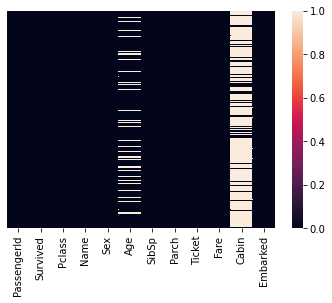

In [5]:
# sns.heatmap(df.isnull())
sns.heatmap(df.isnull(),yticklabels=False)

Observations and Ideas - 

1. Age is only slightly empty. So, we can impute/interpolate it. 
2. Cabin is very much empty. We'll probably remove it, or turn it to a Cabin Filled(Yes/No) kind of column.

 ## Now that we've confirmed the presence of NaN values, we'll visualize and apply statistics to fill these NaN values.

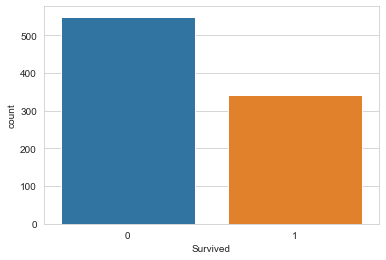

In [9]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

Observations- More than 550 people didn't survive. 350 survived

How many males and Females survived? 

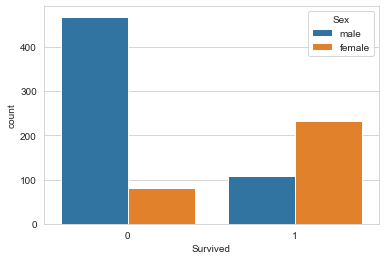

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

Out of the people who didn't Survive. Majority were males.
Out of the people who survived, majority were females.

 **What was the scene with survival and passenger class?**

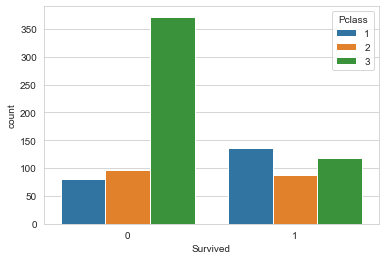

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=df)

The Death rate for people from Class 1 (Premium) was v-low and for Cheapest class, class 3 was too high.

Note- The PClass is an --- ORDINAL DATA Variable

In [14]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Remember- Age and Cabin are Empty**

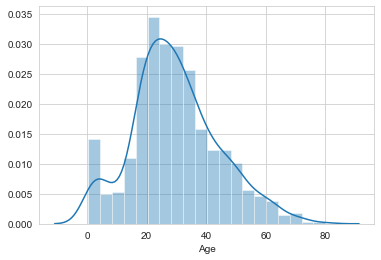

In [15]:
sns.distplot(df['Age'].dropna())

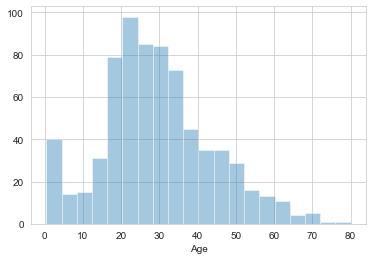

In [18]:
# In this if we do kde=false, it becomes histo.
sns.distplot(df['Age'].dropna(),kde=False)

# This is kind of Normal Distribution with some outliers. 

This is just to see the average AGE  of all the passengers on board. 
But we can do better!

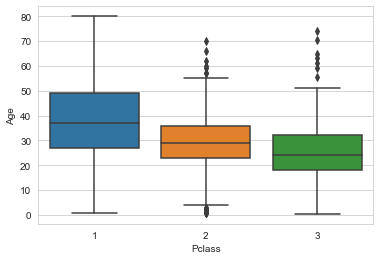

In [19]:
sns.boxplot(x='Pclass',y='Age',data=df)

The cheapest were bought by young people.

In [24]:
#The same thing you visualized above can be solved using a Box-Plot
df.groupby(by='Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [37]:
 #Now, the aim is to fill in the Above values wherever age is missing. 
    
# ac = [['Age','Pclass']]
def impute_age(ac):
    Age = ac[0]
    Pclass = ac[0]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    else:
        return Age

In [38]:
# ac.iloc[:,0]

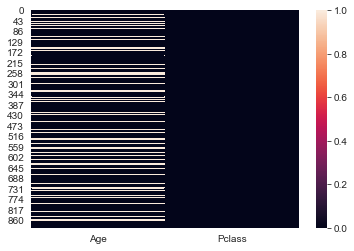

In [39]:
sns.heatmap(ac.isnull())

In [41]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

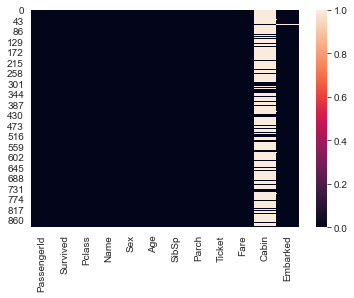

In [43]:
sns.heatmap(df.isnull())

In [44]:
#There are feature engineering ways to handle the case where the 
#coulmn is very empty like the cabin column. 

#So, we will skip that for now and use Feature Engineering. 

In [45]:
df = df.drop('Cabin',axis=1)

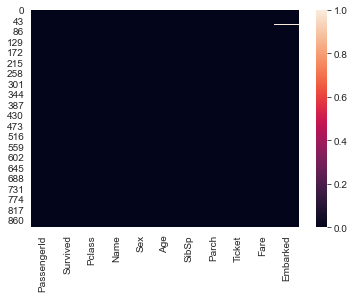

In [47]:
# df.head()
sns.heatmap(df.isnull())

In [48]:
sum(df['Embarked'].isnull())

2

In [49]:
df = df.dropna()

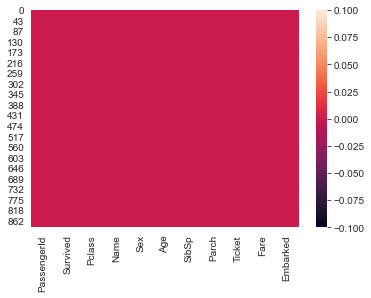

In [50]:
sns.heatmap(df.isnull())

### Missing Values Handled. Now, Just Pick up important features next and perform Encoding of categorical features.

1. Remove the least Calculationwise important columns:
>1. Passenger ID
>2. Name

In [53]:
df.columns

df = df.drop(['PassengerId','Name'],axis=1)

### Handling categorical variables.

In [55]:
#First created encoded versions with originals dropped. 
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [57]:
#Now Append both these columns to the actual dataset.

df = pd.concat([df,sex,embarked],axis=1)

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1


In [59]:
#Ticket is also not importnt
df = df.drop('Ticket',axis=1)

In [60]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0


## Extra Topics (Advanced Python) : Positional & Keyword Args. (* args, **kwargs)

In [76]:
l = [1,2,3]
d = {'name':'Dvyas','Age':25}

def dets(*args,**kwargs):
    
    x = args
    
    y = kwargs
    
#     print(type(x),type(y))
    
    print(x, (y))

In [77]:
dets(*l,**d)

(1, 2, 3) {'name': 'Dvyas', 'Age': 25}


In [78]:
dets(5,6,7,name='divyanshu', day='Mon')

(5, 6, 7) {'name': 'divyanshu', 'day': 'Mon'}
